In [3]:
!pip install numpy==1.22.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 70.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.6.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.6.1 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.81 requires numpy>=1.25.0, but you have numpy 1.22.4 which is incompatible.
cudf 23.6.1 requires protobuf<4.22,>=4.21.6, but you have protobuf 3.20.3 which is incompati

In [7]:
# Holy grail
import numpy as np
import pandas as pd

# Scikit-learn
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

# Visualization
import matplotlib.pyplot as plt
import branca.colormap as cm
import seaborn as sns
import folium
import geopandas as gpd

# Models
from sklearn.ensemble import RandomForestRegressor

# Misc
from haversine import haversine

# Random state
rs = 42

# Load data 📁
***

In [8]:
train = pd.read_csv('/kaggle/input/playground-series-s3e20/train.csv', index_col='ID_LAT_LON_YEAR_WEEK')
test = pd.read_csv('/kaggle/input/playground-series-s3e20/test.csv', index_col='ID_LAT_LON_YEAR_WEEK')

# Data analysis 📊
***

## Train data analysis

In [9]:
train.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

## Mỗi cột đều là số nên chúng tôi sẽ không phải xử lý dữ liệu phân loại

In [12]:
print(train.groupby(['latitude', 'longitude']).size().sort_values())
print()
print(test.groupby(['latitude', 'longitude']).size().sort_values())
print()
print(pd.concat([train, test], axis=0).groupby(['latitude', 'longitude']).size().sort_values())

latitude  longitude
-3.299    30.301       159
-1.444    30.856       159
-1.450    29.350       159
-1.482    30.618       159
-1.486    29.614       159
                      ... 
-2.293    29.507       159
-2.300    29.200       159
-2.301    29.899       159
-2.257    30.243       159
-0.510    29.290       159
Length: 497, dtype: int64

latitude  longitude
-3.299    30.301       49
-1.444    30.856       49
-1.450    29.350       49
-1.482    30.618       49
-1.486    29.614       49
                       ..
-2.293    29.507       49
-2.300    29.200       49
-2.301    29.899       49
-2.257    30.243       49
-0.510    29.290       49
Length: 497, dtype: int64

latitude  longitude
-3.299    30.301       208
-1.444    30.856       208
-1.450    29.350       208
-1.482    30.618       208
-1.486    29.614       208
                      ... 
-2.293    29.507       208
-2.300    29.200       208
-2.301    29.899       208
-2.257    30.243       208
-0.510    29.290       208
Length

In [13]:
train.shape, test.shape

((79023, 75), (24353, 74))

## Có 497 điểm địa lý (cặp tọa độ vĩ độ - kinh độ). Các điểm này giống nhau trong cả tập huấn luyện (train) và tập kiểm tra (test).

Với mỗi điểm địa lý, có:

159 dòng dữ liệu trong tập huấn luyện

49 dòng dữ liệu trong tập kiểm tra

159 dòng trong tập huấn luyện tương ứng với dữ liệu của 3 năm (2019, 2020, 2021), mỗi năm có 53 tuần (tuần được đánh số từ 0 đến 52).

49 dòng trong tập kiểm tra tương ứng với tuần 0 đến tuần 48 của năm 2022.

497 điểm * 3 năm * 53 tuần = 79.023 dòng dữ liệu huấn luyện.

497 điểm * 49 tuần = 24.353 dòng dữ liệu kiểm tra.

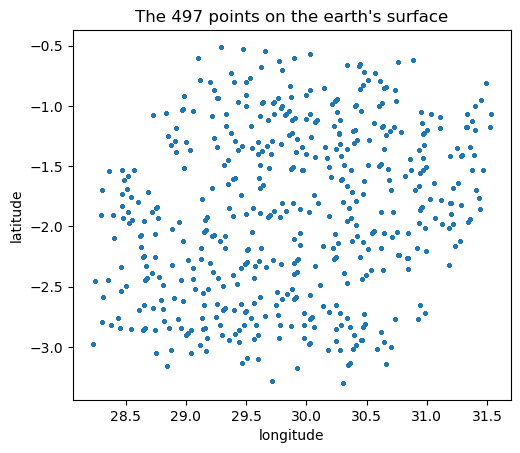

In [14]:
plt.title("The 497 points on the earth's surface")
plt.scatter(train.longitude, train.latitude, s=3)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.gca().set_aspect('equal')
plt.show()

In [15]:
train_coords = train.drop_duplicates(subset = ['latitude', 'longitude'])
geometry = gpd.points_from_xy(train_coords.longitude, train_coords.latitude)
geo_df = gpd.GeoDataFrame(
    train_coords[["latitude", "longitude"]], geometry=geometry
)

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Iterate through list and add a marker for each location
for coordinates in geo_df_list:

    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color =  "red"),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

## Ý Tưởng:
Vì đây là dữ liệu địa lý, nên các phép đo tại những vị trí gần nhau có thể hỗ trợ dự đoán giá trị mục tiêu (target).

không chỉ sử dụng 74 đặc trưng (features) của từng dòng dữ liệu riêng lẻ để dự đoán, mà còn cần kết hợp thông tin từ các vị trí lân cận để cải thiện độ chính xác.

Ngoài ra, dữ liệu này còn là một chuỗi thời gian (time series), nên các giá trị đo trong quá khứ cũng có thể hữu ích cho việc dự đoán giá trị ở thời điểm hiện tại.

In [16]:
{col.split('_')[0] for col in train.columns}

{'CarbonMonoxide',
 'Cloud',
 'Formaldehyde',
 'NitrogenDioxide',
 'Ozone',
 'SulphurDioxide',
 'UvAerosolIndex',
 'UvAerosolLayerHeight',
 'emission',
 'latitude',
 'longitude',
 'week',
 'year'}

## Các đặc trưng không được sử dụng để lập chỉ mục (latitude, longitude, year and week number) vậy là còn 8 đặc trưng: CarbonMonoxide, Cloud, Formaldehyde, NitrogenDioxide, Ozone, SulphurDioxide, UvAerosolIndex and UvAerosolLayerHeight.

In [17]:
missing = train.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(20)

UvAerosolLayerHeight_aerosol_pressure                      78584
UvAerosolLayerHeight_solar_zenith_angle                    78584
UvAerosolLayerHeight_aerosol_height                        78584
UvAerosolLayerHeight_aerosol_optical_depth                 78584
UvAerosolLayerHeight_sensor_zenith_angle                   78584
UvAerosolLayerHeight_sensor_azimuth_angle                  78584
UvAerosolLayerHeight_solar_azimuth_angle                   78584
NitrogenDioxide_NO2_slant_column_number_density            18320
NitrogenDioxide_tropopause_pressure                        18320
NitrogenDioxide_tropospheric_NO2_column_number_density     18320
NitrogenDioxide_absorbing_aerosol_index                    18320
NitrogenDioxide_cloud_fraction                             18320
NitrogenDioxide_sensor_altitude                            18320
NitrogenDioxide_sensor_azimuth_angle                       18320
NitrogenDioxide_sensor_zenith_angle                        18320
NitrogenDioxide_solar_azi

In [18]:
n_rows = len(train)
missing_percent = (missing / n_rows) * 100  # Tỷ lệ phần trăm giá trị thiếu
missing_data = missing_percent[missing_percent > 0].sort_values(ascending=False).head(20)  # Hiển thị các cột có giá trị thiếu

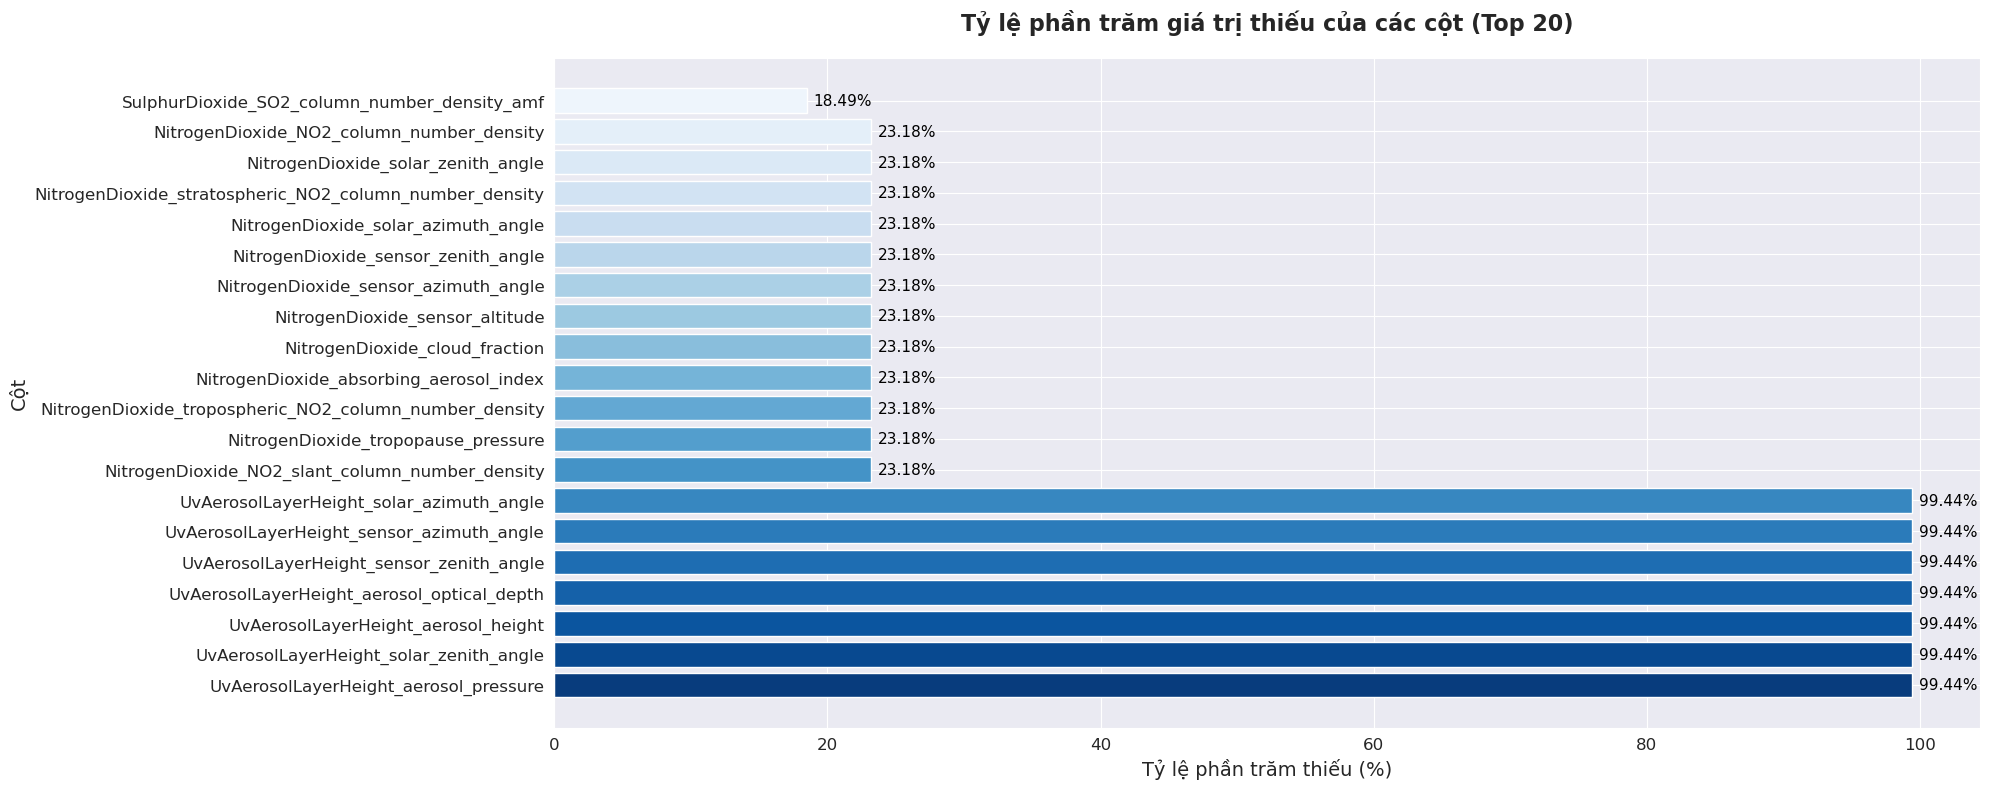

In [19]:
# Thiết lập giao diện seaborn cho biểu đồ đẹp hơn
sns.set_style("darkgrid")

# Vẽ biểu đồ thanh ngang
plt.figure(figsize=(20, 8))  # Tăng kích thước biểu đồ để dễ nhìn
bars = plt.barh(missing_data.index, missing_data, color=sns.color_palette("Blues_r", len(missing_data)))  # Gradient màu xanh

# Đặt tiêu đề và nhãn
plt.title('Tỷ lệ phần trăm giá trị thiếu của các cột (Top 20)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Tỷ lệ phần trăm thiếu (%)', fontsize=14)
plt.ylabel('Cột', fontsize=14)

# Tùy chỉnh kích thước chữ của nhãn trục
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Hiển thị giá trị trên mỗi thanh
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', 
             va='center', ha='left', fontsize=11, color='black')

# Điều chỉnh khoảng cách và bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

## Missing values: Các tính năng từ nhóm UVAeroSollayerHeight có hơn 99% các giá trị bị thiếu. Những cột đó sẽ được loại bỏ sau này.

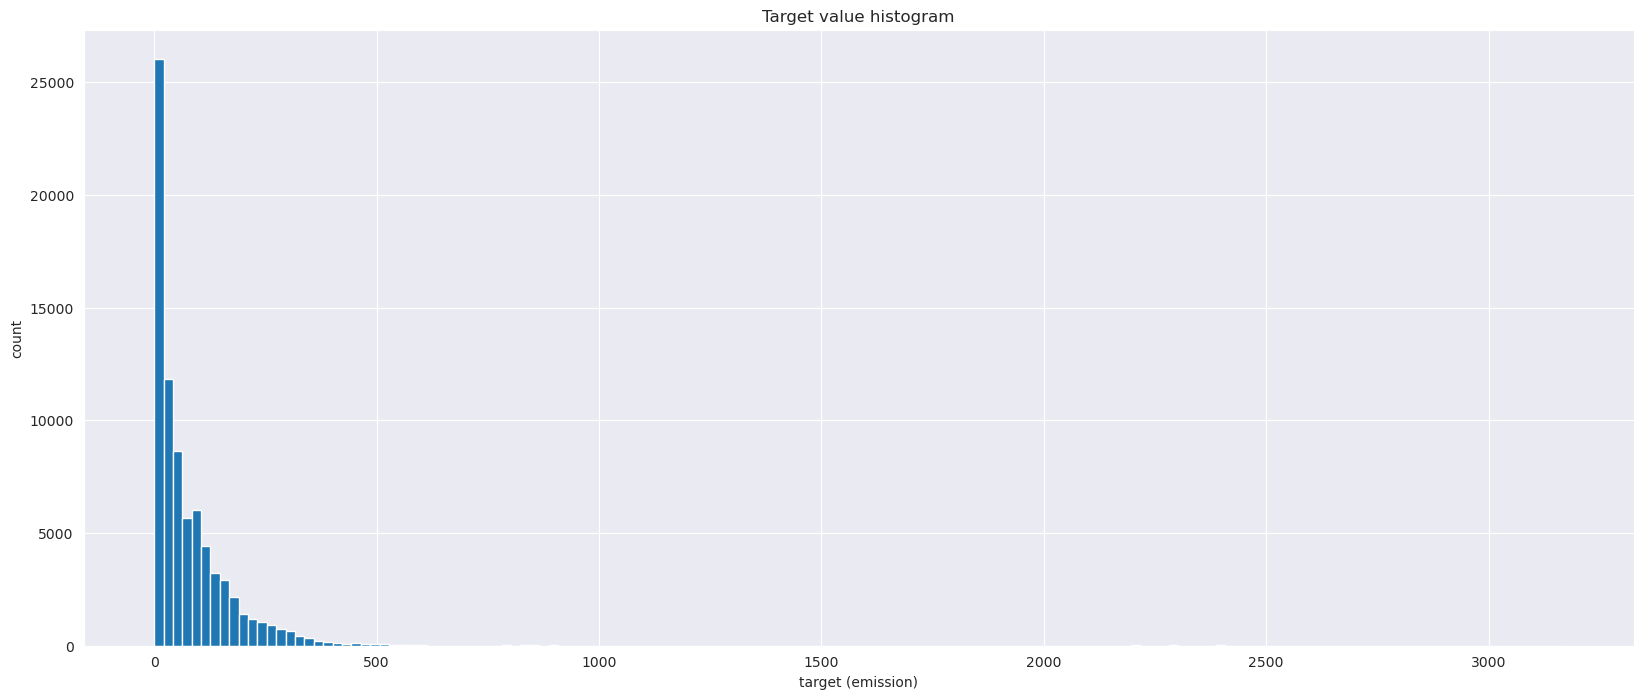

In [20]:
plt.figure(figsize=(20, 8))
plt.hist(train.emission, bins=150)
plt.title('Target value histogram')
plt.xlabel('target (emission)')
plt.ylabel('count')
plt.show()

**Hầu hết các chỉ số phát thải đều không cao hơn 200.**

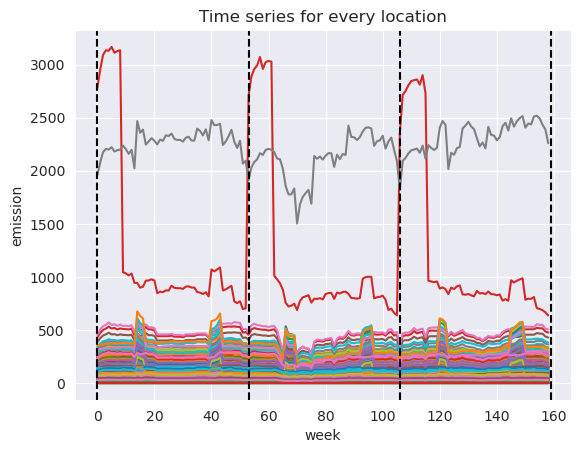

In [21]:
for ll in train[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = train[(train.latitude == ll[1].latitude) & (train.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 159]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

## Chúng ta có thể cố gắng nhận diện xu hướng trong dữ liệu phát thải CO₂. Biểu đồ sau đây cho thấy:

Tại hầu hết các vị trí, lượng phát thải CO₂ giảm từ năm 2019 đến 2020, có thể là do ảnh hưởng của dịch Covid-19.

Tuy nhiên, từ năm 2020 đến 2021, lượng phát thải lại tăng trở lại.

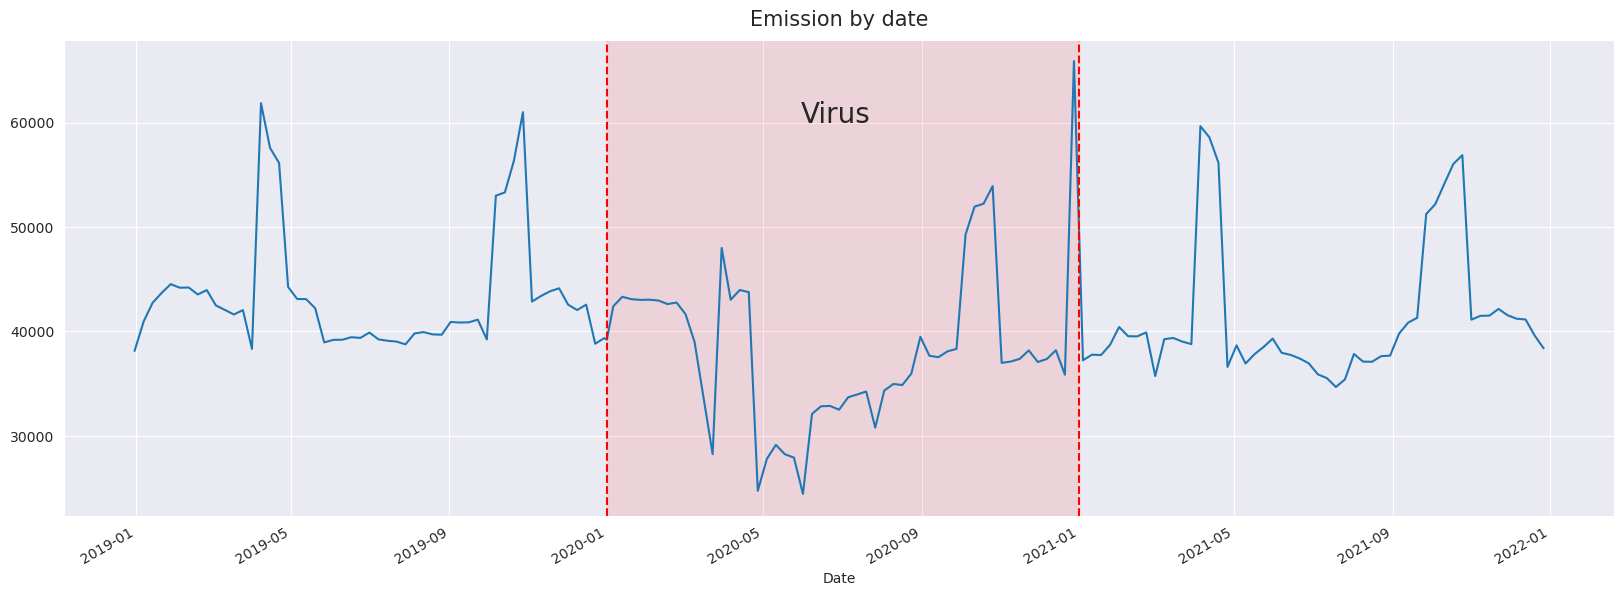

In [22]:
train_plot = train.copy(deep=True)
train_plot['date'] = pd.to_datetime(train_plot['year'].astype(str) + '-' + train_plot['week_no'].astype(str) + '-1', format='%Y-%W-%w') # 1 is a monday and %w day of week otherwise throws error

train_plot.groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 7), xlabel='Date')

plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'), color='red', alpha=0.1)
plt.axvline(pd.Timestamp('2020-01-01'), linestyle = "--", color='red')
plt.axvline(pd.Timestamp('2021-01-01'), linestyle = "--", color='red')

plt.text(pd.Timestamp ('2020-05-30'), 60000, "Virus", size = 20)

plt.title('Emission by date', size=15, pad=10)
plt.show()

**Chúng ta có thể thấy ảnh hưởng cua covid, đặc biệt là vào thang 5 năm 2020. nó là một ngoại lệ mà nó có the gay overfits quá mức cho mô hình, vì vậy sẽ đối phó với nó sau trong quá trình tiền xử lý.**

In [23]:
zero_emissions = train.groupby(['latitude', 'longitude'])['emission'].mean().to_frame()
zero_emissions = zero_emissions[zero_emissions['emission'] == 0]
zero_emissions

,,emission
latitude,longitude,
-2.898,29.002,0.0
-2.859,29.041,0.0
-2.841,29.159,0.0
-2.817,29.283,0.0
-2.496,28.504,0.0
-1.974,28.526,0.0
-1.839,28.761,0.0
-1.833,28.467,0.0
-1.730,28.470,0.0


## Vị trí không có khí thải: Rõ ràng có 15 địa điểm luôn luôn là 0.

In [24]:
# Group the train by 'latitude' and 'longitude' and compute the sum of the 'emission' values for each location
grouped = train.groupby(['latitude', 'longitude'])['emission'].sum().reset_index()

# Create a linear colormap that maps emission values to colors
colormap = cm.LinearColormap(['green', 'red'], vmin=0, vmax=75000) # emssions above 75k will be labeled black

# Create a map centered at the mean latitude and longitude of points
m = folium.Map(location=[grouped['latitude'].mean(), grouped['longitude'].mean()])

# Add a circle marker to the map for each point in grouped dataframe
for _, row in grouped.iterrows():
    rows_emission = row['emission']
    color = 'blue' if rows_emission == 0 else colormap(rows_emission) if rows_emission < 10**5 else 'black'
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=np.sqrt(row['emission'])*15,
        color=color,
        fill=True,
        fill_color= color
    ).add_to(m)

# Fit the map to the bounds of markers
m.fit_bounds(m.get_bounds())

# Display the map
m

## Có 2 địa điểm (vòng tròn màu đen) khí thải cao hơn nhiều so với các địa điểm khác.

<Axes: title={'center': 'Total emissions by location'}>

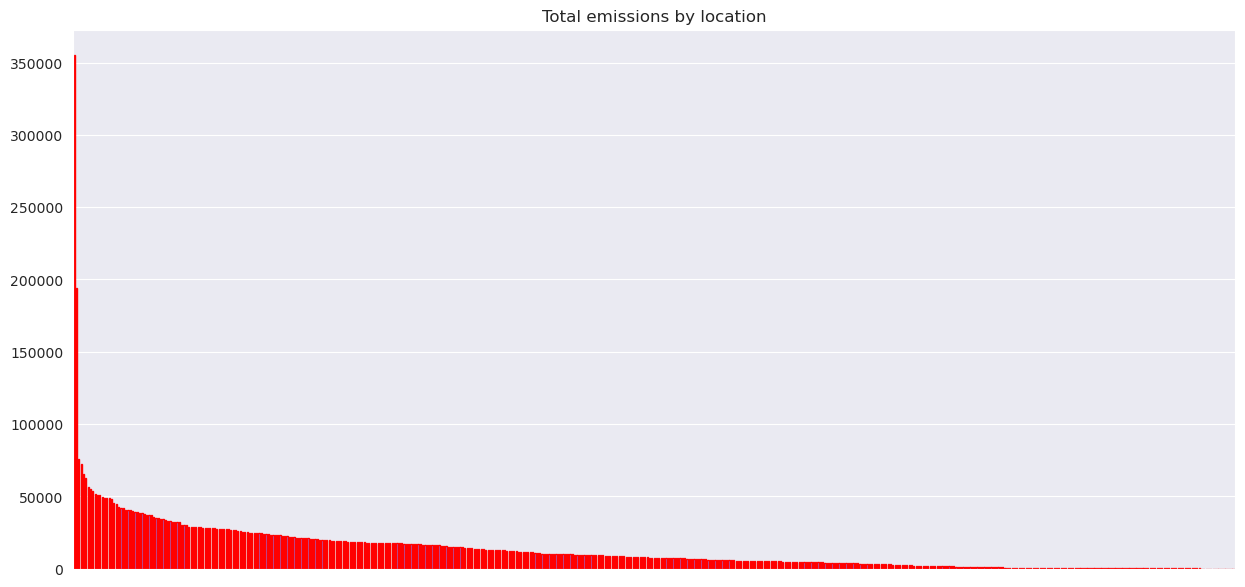

In [25]:
grouped['emission'].sort_values(ascending = False).plot(kind = 'bar', title = 'Total emissions by location', xticks = [], figsize=(15, 7), color="mediumpurple", edgecolor='red')


In [26]:
missing = test.isnull().sum()
missing[missing > 0].sort_values(ascending=False).head(20)

UvAerosolLayerHeight_aerosol_pressure             22260
UvAerosolLayerHeight_solar_zenith_angle           22260
UvAerosolLayerHeight_aerosol_height               22260
UvAerosolLayerHeight_aerosol_optical_depth        22260
UvAerosolLayerHeight_sensor_zenith_angle          22260
UvAerosolLayerHeight_sensor_azimuth_angle         22260
UvAerosolLayerHeight_solar_azimuth_angle          22260
SulphurDioxide_SO2_column_number_density_amf       6142
SulphurDioxide_SO2_column_number_density           6142
SulphurDioxide_SO2_column_number_density_15km      6142
SulphurDioxide_solar_azimuth_angle                 6142
SulphurDioxide_sensor_zenith_angle                 6142
SulphurDioxide_sensor_azimuth_angle                6142
SulphurDioxide_cloud_fraction                      6142
SulphurDioxide_SO2_slant_column_number_density     6142
SulphurDioxide_solar_zenith_angle                  6142
NitrogenDioxide_absorbing_aerosol_index            5655
NitrogenDioxide_solar_azimuth_angle             

In [27]:
n_rows = len(test)
missing_percent = (missing / n_rows) * 100  # Tỷ lệ phần trăm giá trị thiếu
missing_data = missing_percent[missing_percent > 0].sort_values(ascending=False).head(20)  # Hiển thị các cột có giá trị thiếu

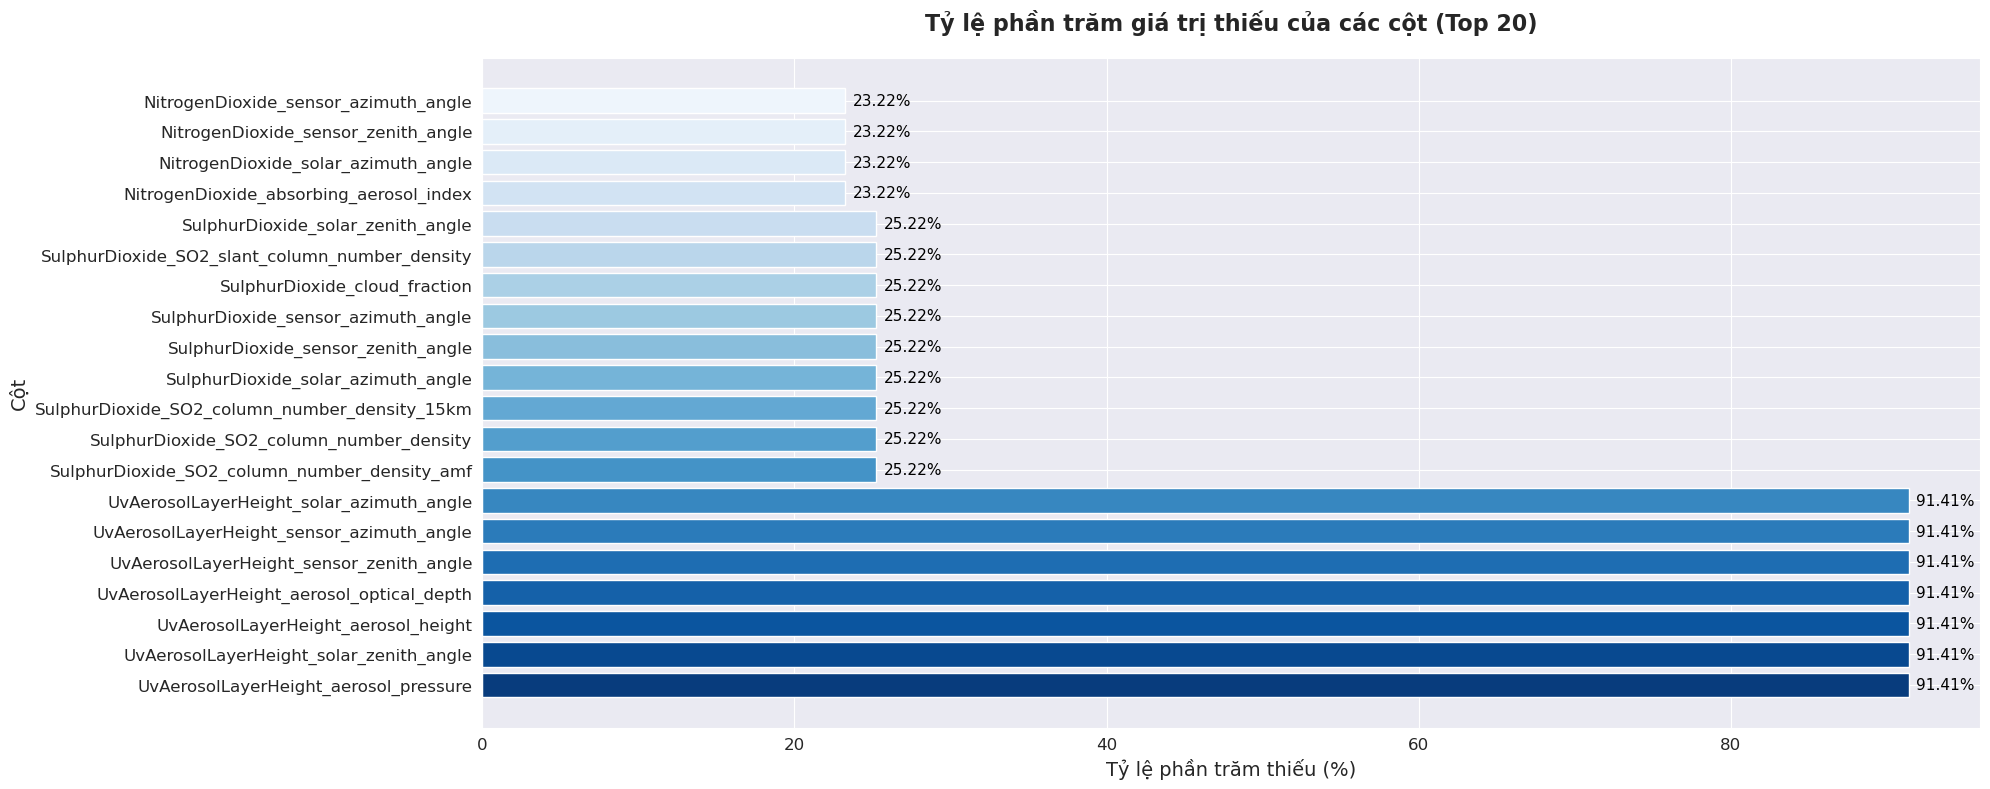

In [28]:
# Thiết lập giao diện seaborn cho biểu đồ đẹp hơn
sns.set_style("darkgrid")

# Vẽ biểu đồ thanh ngang
plt.figure(figsize=(20, 8))  # Tăng kích thước biểu đồ để dễ nhìn
bars = plt.barh(missing_data.index, missing_data, color=sns.color_palette("Blues_r", len(missing_data)))  # Gradient màu xanh

# Đặt tiêu đề và nhãn
plt.title('Tỷ lệ phần trăm giá trị thiếu của các cột (Top 20)', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Tỷ lệ phần trăm thiếu (%)', fontsize=14)
plt.ylabel('Cột', fontsize=14)

# Tùy chỉnh kích thước chữ của nhãn trục
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Hiển thị giá trị trên mỗi thanh
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', 
             va='center', ha='left', fontsize=11, color='black')

# Điều chỉnh khoảng cách và bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

## HEAT MAP

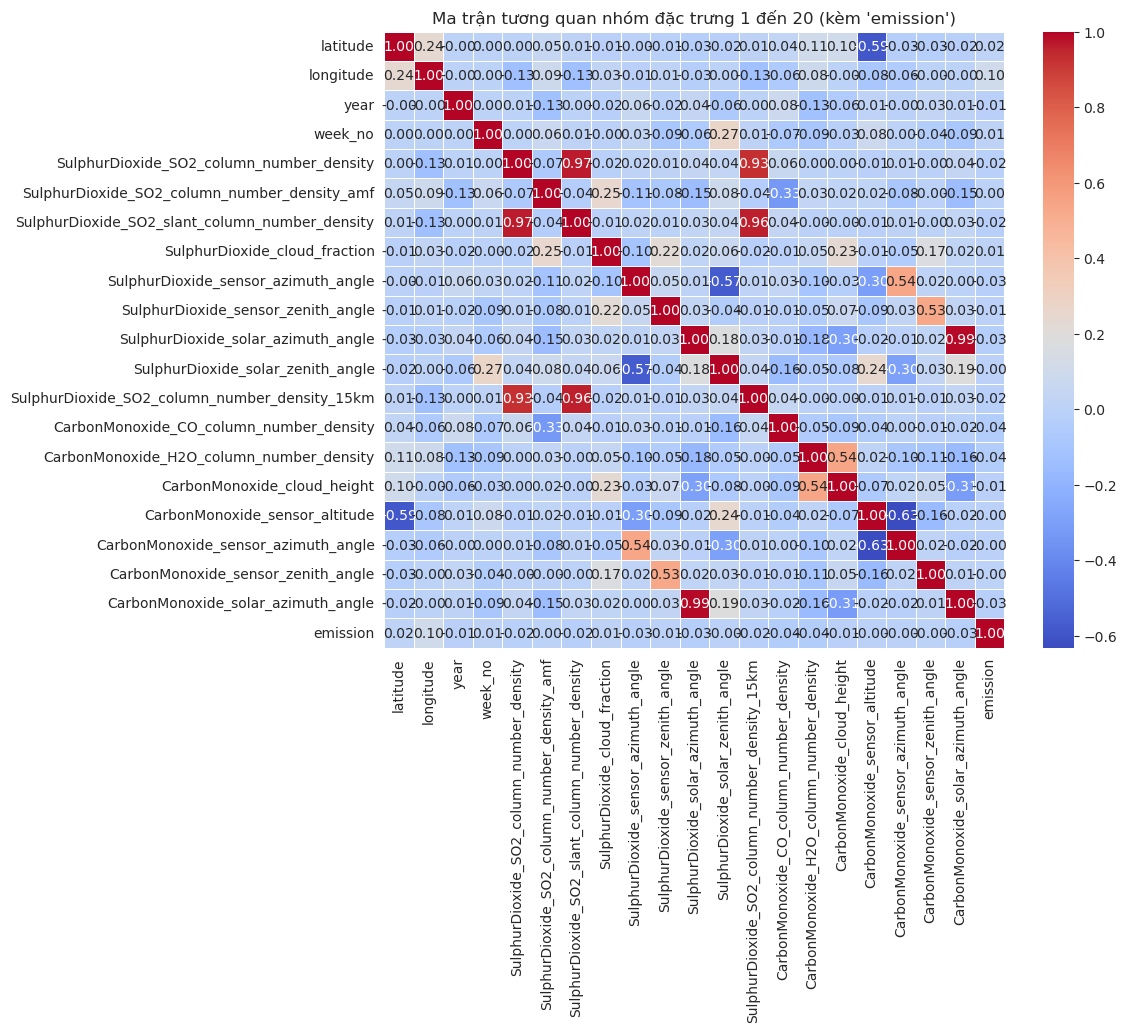

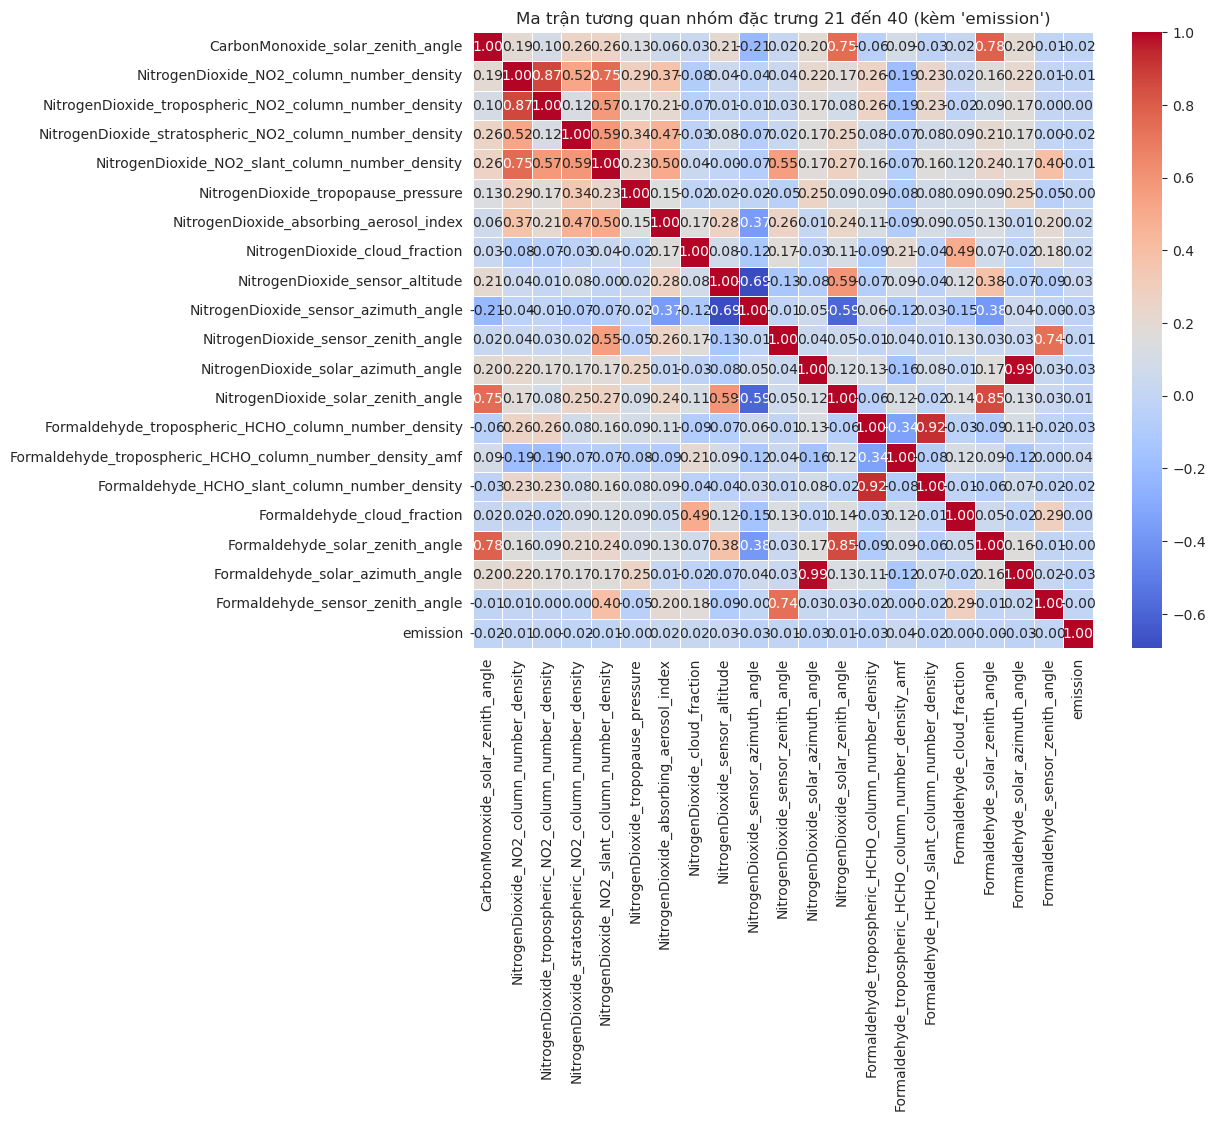

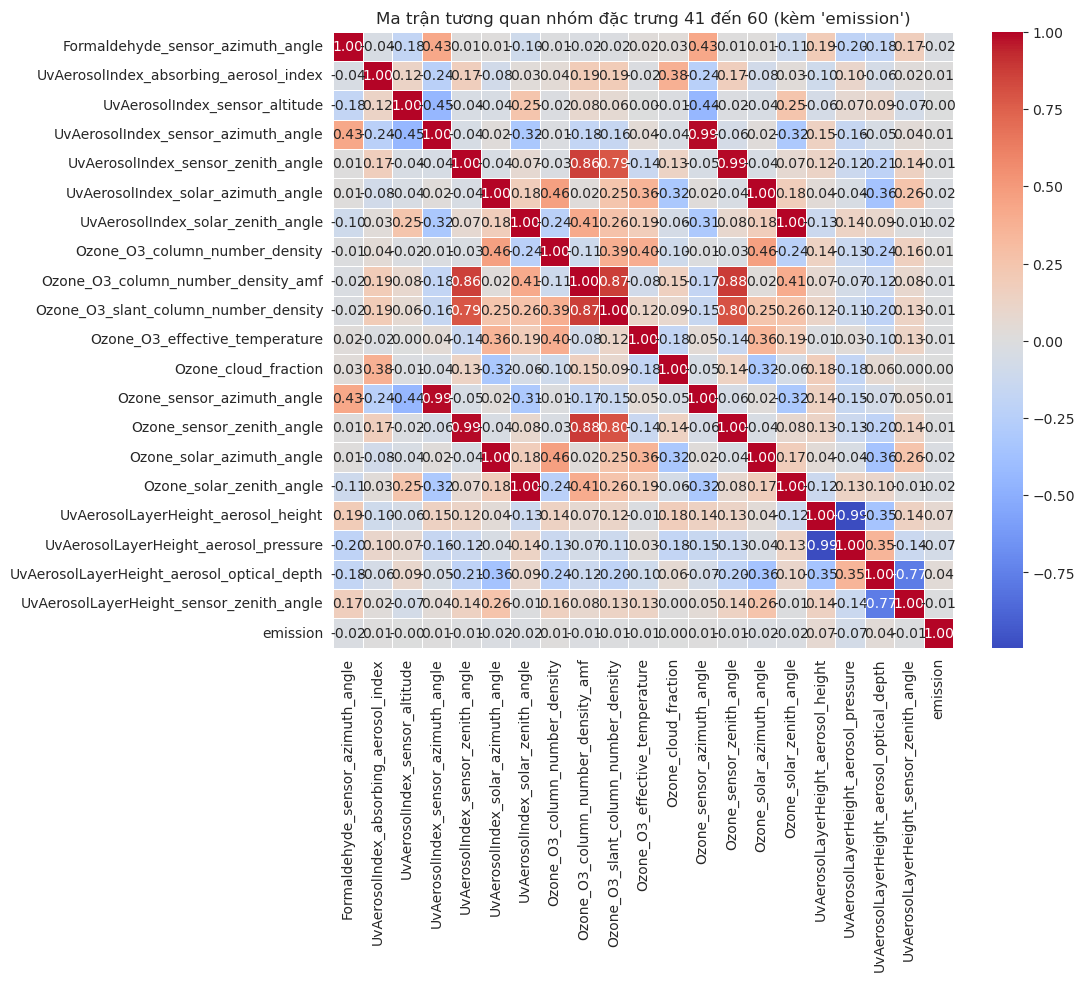

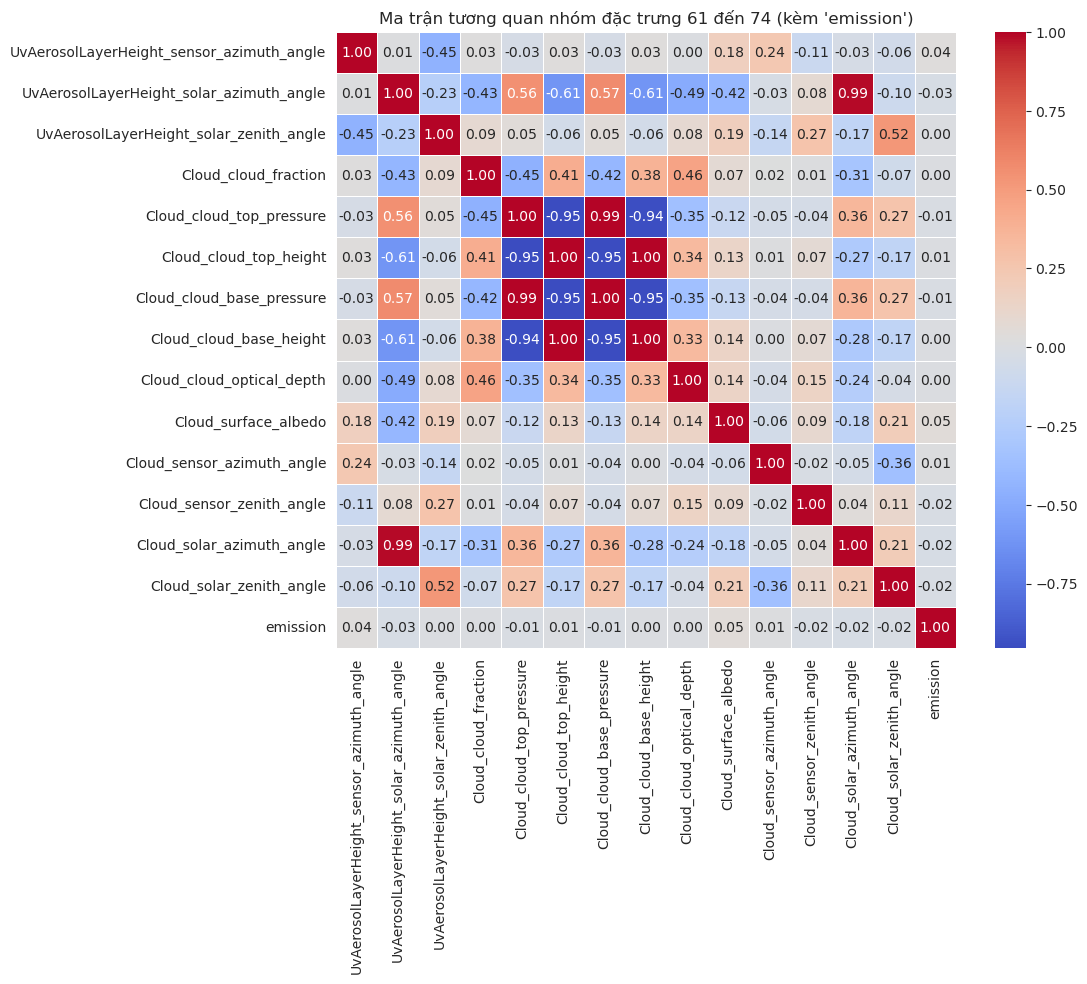

In [38]:
import numpy as np

# Giả sử 'emission' là cột mục tiêu trong train
target_col = 'emission'

# Lấy danh sách đặc trưng, loại bỏ cột 'emission' nếu nó nằm trong danh sách
features = [col for col in train.columns if col != target_col]
n_features = len(features)
chunk_size = 20  # Số đặc trưng mỗi nhóm

# Vẽ heatmap cho từng nhóm + emission
for i in range(0, n_features, chunk_size):
    chunk_features = features[i:i + chunk_size]
    selected_columns = chunk_features + [target_col]  # Thêm cột emission vào nhóm

    chunk_corr = train[selected_columns].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(chunk_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"Ma trận tương quan nhóm đặc trưng {i + 1} đến {i + len(chunk_features)} (kèm 'emission')")
    plt.show()


## Bộ dữ liệu test có tỷ lệ phần trăm giá trị bị thiếu giống với bộ dữ liệu train.

## Tong ket:

1. Tất cả các đặc trưng (features) đều là dữ liệu số — không có dữ liệu dạng phân loại (categorical).
2. Các đặc trưng (trừ các cột dùng để định vị như năm, tuần, vĩ độ, kinh độ) và biến mục tiêu (emission) có thể chia thành 8 nhóm chính — giúp dễ tổ chức và phân tích.
3. Tập huấn luyện (training) bao gồm các quan sát được thu thập từ năm 2019 đến năm 2021.
4. Một giá trị phát thải CO₂ (emission) có thể dao động từ 0.3 đến gần 3200, cho thấy khoảng biến thiên rất rộng.
5. Nhóm đặc trưng Uv Aerosol có tỷ lệ thiếu dữ liệu rất cao và còn có hiện tượng lệch phân phối (data drift) rõ rệt giữa train và test → nên loại bỏ
6. Dữ liệu được ghi nhận từ 497 điểm địa lý khác nhau (tọa độ vĩ độ - kinh độ).
7. Giá trị phát thải CO₂ chịu ảnh hưởng mạnh từ yếu tố mùa vụ hoặc dịp lễ, vì vậy tính thời gian (tuần/năm) rất quan trọng.
8. Có 2 địa điểm có lượng phát thải cực kỳ cao — cần chú ý vì có thể ảnh hưởng đến phân phối hoặc huấn luyện mô hình.
9. Dữ liệu kiểm tra (test set) được thu thập từ cùng các vị trí như trong tập huấn luyện.
10. Tập test bao gồm 49 tuần đầu tiên của năm 2022 — và đó chính là phần mà mô hình sẽ phải dự đoán.

# Feature engineering 🛠️
***

## Add date

In [ ]:
train['date'] = pd.to_datetime(train['year'].astype(str) + '-' + train['week_no'].astype(str) + '-1', format='%Y-%W-%w') # '-1' means Monday, without it to_datetime() raises error 

In [ ]:
train['date']

Loại bỏ nhóm đặc trưng Uv Aerosol
Nhóm đặc trưng Uv Aerosol nên bị loại bỏ khỏi dữ liệu vì
1. Tỷ lệ thiếu dữ liệu cực cao (hơn 99%)
Gần như toàn bộ giá trị trong nhóm này là NaN (giá trị bị thiếu).
Điều này khiến việc xử lý (như điền giá trị) trở nên không đáng tin cậy và có thể gây nhiễu cho mô hình.

In [ ]:
train.drop(columns=['UvAerosolLayerHeight_aerosol_pressure', 'UvAerosolLayerHeight_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_height', 'UvAerosolLayerHeight_aerosol_optical_depth', 'UvAerosolLayerHeight_sensor_zenith_angle', 'UvAerosolLayerHeight_sensor_azimuth_angle', 'UvAerosolLayerHeight_solar_azimuth_angle'], inplace=True)

## Fix virus year

In [ ]:
    # Calculate the average monthly sales for non-virus years (2019 and 2021)
    avg_emission_non_virus = train[train['year'].isin((2019,2021))].groupby('week_no')['emission'].mean()
    
    # Calculate the average monthly for virus year (2020)
    avg_emission_virus = train[train['year'] == 2020].groupby('week_no')['emission'].mean()
    
    # Calculate the ratios for each month
    ratios_for_weeks = avg_emission_non_virus/avg_emission_virus
    
    # Multiply the num_sold column for each row in 2020 by the corresponding ratio for the week of that row
    train.loc[train['year'] == 2020, 'emission'] *= train['week_no'].map(ratios_for_weeks)

In [ ]:
train.groupby(['date'])['emission'].sum().plot(kind='line', figsize=(20, 7), xlabel='Date')

plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'), color='green', alpha=0.1)
plt.axvline(pd.Timestamp('2020-01-01'), linestyle = "--", color='green')
plt.axvline(pd.Timestamp('2021-01-01'), linestyle = "--", color='green')

plt.text(pd.Timestamp('2020-05-22'), 62000, "No virus", size = 17)

plt.title('Emission by date', size=15, pad=10)
plt.show()

Ý tưởng đằng sau cách tiếp cận của tôi là so sánh lượng khí thải trung bình hàng tuần trong năm 2019 và 2021 với lượng khí thải trung bình hàng tuần trong năm 2020 và tính tỷ lệ cho từng tuần. Sau đó, chúng tôi sử dụng các tỷ lệ này để điều chỉnh các giá trị phát thải trong năm 2020, sao cho chúng gần với giá trị phát thải nếu không có tác động của vi-rút. Điều này dẫn đến năm 2020 tương tự như các năm lân cận.

In [ ]:
# Let's fix the large spike in the last week of 2020. It's an outlier.
train.loc[(train['week_no'] == 52) & (train['year'] == 2020), 'emission'] = np.power(train.loc[(train['week_no'] == 52) & (train['year'] == 2020), 'emission'], 1/1.5)

Rwanda có 4 mùa khí hậu rõ rệt trong năm, được chia như sau:

Mùa mưa dài: từ tháng 3 đến tháng 5

Mùa khô dài: từ tháng 6 đến tháng 8

Mùa mưa ngắn: từ tháng 9 đến tháng 11

Mùa khô ngắn: từ tháng 12 đến tháng 2

Dựa trên thông tin này, chúng ta sẽ tạo thêm một đặc trưng (feature) mới có tên là season, với các mùa được đánh nhãn từ 1 đến 4 để mô hình dễ học hơn.

In [ ]:
train['season'] = train['date'].dt.month.apply(lambda x: 1 if 3 <= x <= 5 else 2 if 6 <= x <= 8 else 3 if 9 <= x <= 11 else 4)

## Holidays

In [ ]:
train['holidays'] = (train['week_no'].isin([0, 51, 12, 30]))
train['holidays'].head()

📌 Giải thích ý nghĩa các tuần:
week_no = 0: Tuần đầu năm (gần Tết Dương lịch).

week_no = 51: Tuần cuối năm (Giáng Sinh – Năm mới).

week_no = 12: Khoảng cuối tháng 3 – có thể liên quan đến Lễ Phục sinh hoặc nghỉ học.

week_no = 30: Khoảng cuối tháng 7 – có thể là kỳ nghỉ giữa năm.

Những tuần này thường trùng với kỳ nghỉ lễ hoặc thay đổi hành vi sinh hoạt, nên có thể ảnh hưởng đến lượng khí thải (ít đi lại, ít sản xuất...).


## Cyclic features

In [ ]:
train['week_sin'] = np.sin(2 * np.pi * train['week_no']/53)
train['week_cos'] = np.cos(2 * np.pi * train['week_no']/53)

# If season imporved LB and didn't introduce more overfitting it would be a good idea to create cyclic features for it
# train['season_sin'] = np.sin(2 * np.pi * train['season']/4)

# train['season_cos'] = np.cos(2 * np.pi * train['season']/4)

giúp mô hình hiểu được:

Tuần 0 và tuần 52 gần nhau, chứ không phải xa nhau như khi dùng giá trị số thông thường.

Thể hiện tính tuần hoàn của năm mà vẫn giữ được liên kết giữa các tuần gần nhau theo chu kỳ

## Rotating location

In [ ]:
# From Yang Zhou https://www.kaggle.com/code/yaaangzhou/en-playground-s3-e20-eda-modeling
train['rot_15_x'] = (np.cos(np.radians(15)) * train['longitude']) + (np.sin(np.radians(15)) * train['latitude'])

train['rot_15_y'] = (np.cos(np.radians(15)) * train['latitude']) + (np.sin(np.radians(15)) * train['longitude'])

train['rot_30_x'] = (np.cos(np.radians(30)) * train['longitude']) + (np.sin(np.radians(30)) * train['latitude'])

train['rot_30_y'] = (np.cos(np.radians(30)) * train['latitude']) + (np.sin(np.radians(30)) * train['longitude'])

## Clustering

In [ ]:
avg_emissions_for_location = train.groupby(['latitude', 'longitude'], as_index=False)['emission'].mean()

cluster_num = 7
kmeans = KMeans(cluster_num, n_init='auto',random_state=rs).fit(avg_emissions_for_location)

# Each of 7 centers has 3 coordinates to describe it - lat, long and emission. But we only need lat and long to calculate distance.
centers = kmeans.cluster_centers_[:, :2]

# Get numpy array where i-th element is a cluster number for i-th location in our DataFrame
clusters = kmeans.predict(avg_emissions_for_location)

# For each location add cluster and its center coordinates 
avg_emissions_for_location["cluster"] = clusters
avg_emissions_for_location[["latitude_cluster", "longitude_cluster"]] = centers[clusters]

# Calculate distance from location to its cluster's center
highest_emission_location = avg_emissions_for_location.loc[avg_emissions_for_location['emission'].idxmax()]

avg_emissions_for_location['distance_to_max_emission'] = avg_emissions_for_location.apply(
    lambda x: haversine(
        (x['latitude'], x['longitude']),
        (highest_emission_location['latitude'],
         highest_emission_location['longitude'])),
    axis=1
)

# Each emission reading (row) from training set will now have its cluster and distance to cluster's center
# Clusters range from [0, 8]
train = train.merge(
    avg_emissions_for_location[['latitude', 'longitude', 'cluster', 'distance_to_max_emission']],
    on=['latitude', 'longitude'],
).set_index(train.index)

## Select features
sẽ chỉ sử dụng một tập hợp nhỏ các tính năng. Nó chỉ ra rằng mô hình hoạt động tốt nhất với một vài tính năng có nguồn gốc từ các tính năng lập chỉ mục vì các cột khác chỉ thêm nhiễu. Vì vậy, không cần phải bỏ nhóm tính năng Aerosole UV vì chúng tôi đang lựa chọn các tính năng mà chúng tôi muốn sử dụng.

In [ ]:
training_cols = ['latitude', 'longitude', 'year', 'week_sin', 'week_cos', 'holidays', 'rot_15_x', 'rot_15_y', 'rot_30_x', 'rot_30_y', 'distance_to_max_emission']

In [ ]:
train[training_cols]